# PASCAL VOC 2012 Image Segmentation

## [PASCAL VOC2012 Example Segmentations](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/segexamples/index.html)

Below are training examples for the segmentation taster, each consisting of:

- the training image
- the object segmentation : pixel indices correspond to the first, second, third object etc.
- the class segmentation: pixel indices correspond to classes in alphabetical order (1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle, 6=bus, 7=car , 8=cat, 9=chair, 10=cow, 11=diningtable, 12=dog, 13=horse, 14=motorbike, 15=person, 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor)

For both types of segmentation image, `index 0` corresponds to background and `index 255` corresponds to 'void' or unlabeled.

<img src="../files/voc2012-segexamples.png" alt="segmentation image" width="500"/>

## Convert 1-D Label to 3-D RGB Vector
The label image is a `single-channel 8-bit paletted image`. In an `8-bit paletted image` every pixel value is an index into an array of 256 RGB values. The color palette in `PASCAL VOC` is chosen such that adjacent values map to very different colors in order to make classes more easily distinguishable during visual inspection, which can be found in [the official Matlab code](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html#devkit). Or in this [Python version at my gist repository](https://gist.github.com/ccj5351/ae554ea70cef79ab1efdb3f9f92d2b37). The following `color_map()` function returns the color palette in PASCAL VOC:

In [3]:
import numpy as np
from skimage.io import imshow
import matplotlib.pyplot as plt

def color_map(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            c = c >> 3

        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap

Classes/labels are mapped to numerical IDs as follows: 

```plain
#0:   background
#1:   aeroplane
#2:   bicycle
#3:   bird
#4:   boat
#5:   bottle
#6:   bus
#7:   car
#8:   cat
#9:   chair
#10:  cow
#11:  diningtable
#12:  dog
#13:  horse
#14:  motorbike
#15:  person
#16:  pottedplant
#17:  sheep
#18:  sofa
#19:  train
#20:  tvmonitor
#255: void/unlabelled
```

As shown in the following fuction:

In [4]:
""" get the mapping from label to RGB-color, given the color palette in PASCAL VOC """

def color_map_info(palette):
    labels = [
          'background', #0
          'aeroplane', #1
          'bicycle', #2
          'bird', #3
          'boat', #4
          'bottle', #5
          'bus', #6
          'car', #7
          'cat', #8
          'chair', #9
          'cow', #10
          'diningtable', #11
          'dog', #12
          'horse', #13
          'motorbike', #14
          'person', #15
          'pottedplant', #16
          'sheep', #17
          'sofa', #18
          'train', #19
          'tv/monitor', #20
          "void/unlabelled", #255
          ] 
    print 'class colormap and palette = {r,g,b}'
    for i in range(0,21*3,3):
        print '# {:>3d}: {:<20} (R,G,B) = {},{},{}'.format(i/3, labels[i/3], palette[i], palette[i+1],palette[i+2])
    i = 255*3
    print '# {:>3d}: {:<20} (R,G,B) = {},{},{}'.format(i/3, labels[21], palette[i], palette[i+1],palette[i+2])


""" generate the color palette in PASCAL VOC via the color_map() function shown as above """
palette1 = color_map(N = 256)
palette1 = np.reshape(palette1, [-1,]) # reshape to 1-D array;
color_map_info(palette1)

class colormap and palette = {r,g,b}
#   0: background           (R,G,B) = 0,0,0
#   1: aeroplane            (R,G,B) = 128,0,0
#   2: bicycle              (R,G,B) = 0,128,0
#   3: bird                 (R,G,B) = 128,128,0
#   4: boat                 (R,G,B) = 0,0,128
#   5: bottle               (R,G,B) = 128,0,128
#   6: bus                  (R,G,B) = 0,128,128
#   7: car                  (R,G,B) = 128,128,128
#   8: cat                  (R,G,B) = 64,0,0
#   9: chair                (R,G,B) = 192,0,0
#  10: cow                  (R,G,B) = 64,128,0
#  11: diningtable          (R,G,B) = 192,128,0
#  12: dog                  (R,G,B) = 64,0,128
#  13: horse                (R,G,B) = 192,0,128
#  14: motorbike            (R,G,B) = 64,128,128
#  15: person               (R,G,B) = 192,128,128
#  16: pottedplant          (R,G,B) = 0,64,0
#  17: sheep                (R,G,B) = 128,64,0
#  18: sofa                 (R,G,B) = 0,192,0
#  19: train                (R,G,B) = 128,192,0
#  20: tv/monitor    

We can compare the palette above with the palette in any segmentation class label. For example, load the image label `VOC2012/SegmentationClass/2011_003078.png` in the following:

In [13]:
from PIL import Image
annotation = "/home/ccj/seg-depth/datasets/pascal_voc_seg/VOCdevkit/VOC2012/SegmentationClass/2011_003078.png"
palette = Image.open(annotation).getpalette()
color_map_info(palette1)
# compare these two color maps
res = np.sum(palette - palette1)
print "\nSum(palette - palette1) =  {}".format(res)

class colormap and palette = {r,g,b}
#   0: background           (R,G,B) = 0,0,0
#   1: aeroplane            (R,G,B) = 128,0,0
#   2: bicycle              (R,G,B) = 0,128,0
#   3: bird                 (R,G,B) = 128,128,0
#   4: boat                 (R,G,B) = 0,0,128
#   5: bottle               (R,G,B) = 128,0,128
#   6: bus                  (R,G,B) = 0,128,128
#   7: car                  (R,G,B) = 128,128,128
#   8: cat                  (R,G,B) = 64,0,0
#   9: chair                (R,G,B) = 192,0,0
#  10: cow                  (R,G,B) = 64,128,0
#  11: diningtable          (R,G,B) = 192,128,0
#  12: dog                  (R,G,B) = 64,0,128
#  13: horse                (R,G,B) = 192,0,128
#  14: motorbike            (R,G,B) = 64,128,128
#  15: person               (R,G,B) = 192,128,128
#  16: pottedplant          (R,G,B) = 0,64,0
#  17: sheep                (R,G,B) = 128,64,0
#  18: sofa                 (R,G,B) = 0,192,0
#  19: train                (R,G,B) = 128,192,0
#  20: tv/monitor    

So until now, we check that the color_map() function does generate the color palette in PASCAL VOC.

## Color Map Visualization

See the following function to show the color map:

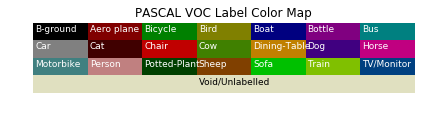

In [15]:
# added by CCJ:
""" arrange these 21 classes to 2D matrix with 3 rows and 7 columns"""
def color_map_viz(fname = None):
    labels = ['B-ground', 'Aero plane', 'Bicycle', 'Bird', 'Boat', 'Bottle', 
            'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Dining-Table', 'Dog', 'Horse',
            'Motorbike', 'Person', 'Potted-Plant', 'Sheep', 'Sofa', 'Train', 
            'TV/Monitor', 'Void/Unlabelled']

    nclasses = 21
    row_size = 80
    col_size = 250
    cmap = color_map()

    """ arrange these 21 classes to 2D matrix with 3 rows and 7 columns"""
    r = 3
    c = 7
    delta = 10
    array = np.empty((row_size*(r+1), col_size*c, cmap.shape[1]), dtype=cmap.dtype)
    fig=plt.figure()
    for r_idx in range(0,r):
        for c_idx in range(0,c):
            i = r_idx *c + c_idx
            array[r_idx*row_size:(r_idx+1)*row_size, c_idx*col_size: (c_idx+1)*col_size, :] = cmap[i]
            x = c_idx*col_size + delta
            y = r_idx*row_size + row_size/2
            s = labels[i]
            plt.text(x, y,s, fontsize=9, color='white')
            #print "write {} at pixel (r={},c={})".format(labels[i], y,x)

    array[r*row_size:(r+1)*row_size, :] = cmap[-1]
    x = 3*col_size + delta
    y = r*row_size + row_size/2
    s = labels[-1]
    plt.text(x, y,s, fontsize=9, color='black')
    #print "write {} at pixel (r={},c={})".format(labels[i], y,x)
    plt.title("PASCAL VOC Label Color Map")
    imshow(array)
    axis = plt.subplot(1, 1, 1)
    plt.axis('off')
    if fname and fname is not '':
        plt.savefig(fname, dpi=300,bbox_inches='tight', pad_inches=0.1)
    else:
        plt.show()
        
#color_map_viz(fname = "/home/ccj/seg-depth/datasets/pascal_voc_seg/pascal-voc-label-color-map.jpg")
color_map_viz()

## [Convert 3-D RGB Vector to 1-D Label](https://github.com/NVIDIA/DIGITS/tree/master/examples/semantic-segmentation)

If your segmentation masks are RGB images, you would need to convert each 3-D RGB vector into a 1-D label.

### Just based on the color_map definition
Just mannually map the RGB color to 1-d class label based on the abvoe color map definition.

### Check How it is finished in the Deeplab Official Code

I checked the function [deeplab/datasets/remove_gt_colormap.py](https://github.com/tensorflow/models/blob/master/research/deeplab/datasets/remove_gt_colormap.py) in the [TensorFlow code of Deeplab](https://github.com/tensorflow/models/tree/master/research/deeplab) for loading and converting the segmentation labels.

In [40]:
from PIL import Image
import tensorflow as tf
import cv2

def _remove_colormap_deeplab(filename):
  """Removes the color map from the annotation.

  Args:
    filename: Ground truth annotation filename.

  Returns:
    Annotation without color map.
  """
  return np.array(Image.open(filename))

def _save_annotation_deeplab(annotation, filename):
  """Saves the annotation as png file.

  Args:
    annotation: Segmentation annotation.
    filename: Output filename.
  """
  pil_image = Image.fromarray(annotation.astype(dtype=np.uint8))
  with tf.gfile.Open(filename, mode='w') as f:
      pil_image.save(f, 'PNG')


# Testing the conversion
annotation = "/home/ccj/seg-depth/datasets/pascal_voc_seg/VOCdevkit/VOC2012/SegmentationClass/2011_003078.png"
raw_annotation = _remove_colormap_deeplab(annotation)
raw_annotation_fname = "/home/ccj/seg-depth/datasets/pascal_voc_seg/VOCdevkit/VOC2012/SegmentationClassRaw/2011_003078.png"
_save_annotation_deeplab(raw_annotation, raw_annotation_fname)

src_annota = cv2.imread(annotation)
print 'src_annota shape = ', src_annota.shape
#cv2.imshow('src_annota',src_annota)
#cv2.waitKey()
print type(src_annota[151,160, 0]), type(raw_annotation[151,160])
r=151
c=160
print 'src pixel ({}, {}) = {}(BRG), raw pixel ({}, {}) = {}(class id)'.format(r,c,src_annota[r,c], r,c,raw_annotation[r,c])
r=153
c=270
print 'src pixel ({}, {}) = {}(BGR), raw pixel ({}, {}) = {}(class id)'.format(r,c,src_annota[r,c], r,c,raw_annotation[r,c])

src_annota shape =  (367, 500, 3)
<type 'numpy.uint8'> <type 'numpy.uint8'>
src pixel (151, 160) = [0 0 0](BRG), raw pixel (151, 160) = 0(class id)
src pixel (153, 270) = [128 128 192](BGR), raw pixel (153, 270) = 15(class id)


### Analysis in details:
Let us do some analysis to these two functions:

In [49]:
def _remove_colormap(filename):
  """Removes the color map from the annotation.

  Args:
    filename: Ground truth annotation filename.

  Returns:
    Annotation without color map.
  """
  img = Image.open(filename)
  print 'The loaded iame via Image.open(filename) has the mode : {}, size : {}'.format(img.mode, img.size)
  res = np.array(img)
  print 'The converted numpy array from Image object, has the shape = ', res.shape
  r=151
  c=160
  print ' - where, pixel ({}, {}) = {}'.format(r,c,res[r,c])
  r=153
  c=270
  print ' - and    pixel ({}, {}) = {}'.format(r,c,res[r,c])
  #return np.array(Image.open(filename))
  return res

def _save_annotation(annotation, filename):
  """Saves the annotation as png file.
  Args:
    annotation: Segmentation annotation.
    filename: Output filename.
  """

  #pil_image = Image.fromarray(annotation.astype(dtype=np.uint8))
  pil_image = Image.fromarray(annotation)
  pil_image.save(filename, 'PNG')

# Testing the conversion
annotation = "/home/ccj/seg-depth/datasets/pascal_voc_seg/VOCdevkit/VOC2012/SegmentationClass/2011_003078.png"
raw_annotation = _remove_colormap(annotation)
raw_annotation_fname = "/home/ccj/seg-depth/datasets/pascal_voc_seg/VOCdevkit/VOC2012/SegmentationClassRaw/2011_003078.png"
_save_annotation(raw_annotation, raw_annotation_fname)

src_annota = cv2.imread(annotation)
print 'cv2 loaded image at numpy src_annota shape = ', src_annota.shape
#cv2.imshow('src_annota',src_annota)
#cv2.waitKey()
print type(src_annota[151,160, 0]), type(raw_annotation[151,160])
r=151
c=160
print 'src pixel ({}, {}) = {}(BRG), raw pixel ({}, {}) = {}(class id)'.format(r,c,src_annota[r,c], r,c,raw_annotation[r,c])
r=153
c=270
print 'src pixel ({}, {}) = {}(BGR), raw pixel ({}, {}) = {}(class id)'.format(r,c,src_annota[r,c], r,c,raw_annotation[r,c])

The loaded iame via Image.open(filename) has the mode : P, size : (500, 367)
The converted numpy array from Image object, has the shape =  (367, 500)
 - where, pixel (151, 160) = 0
 - and    pixel (153, 270) = 15
cv2 loaded image at numpy src_annota shape =  (367, 500, 3)
<type 'numpy.uint8'> <type 'numpy.uint8'>
src pixel (151, 160) = [0 0 0](BRG), raw pixel (151, 160) = 0(class id)
src pixel (153, 270) = [128 128 192](BGR), raw pixel (153, 270) = 15(class id)


The generated 1-d label is shown as below

<img src="../files/seg_class_raw_2011_003078.png" alt="seg_class_raw_2011_003078" width="500"/>

So three important things [????]:
- 1) The label images provided by PASCAL VOC 2012 is in `.png` format, which already contains the PASCAL VOC color palette in it;
- 2) So once this '.png' label image is loaded as a Pillow Image object, it will have the `'P' mode`, meaning 8-bit pixels, mapped to any other mode using `a color palette`;
- 3) Due to the `'P' mode`, converting this PIL Image object into a numpy array, will map every pixel value into an index into the palette array of 256 RGB values.

Could check this question - [How to convert a PIL Image into a numpy array?](https://stackoverflow.com/questions/384759/how-to-convert-a-pil-image-into-a-numpy-array/37675266) and the Pillow Image Class [source code](https://github.com/python-pillow/Pillow/blob/730cf93c32ffb747c018afffe597ef9ae264a20a/PIL/Image.py#L633).

### Pillow : Image Modes

The mode of an image defines the type and depth of a pixel in the image. The current release supports the following standard modes:

- 1 (1-bit pixels, black and white, stored with one pixel per byte)
- L (8-bit pixels, black and white)
- `P (8-bit pixels, mapped to any other mode using a color palette)`
- RGB (3x8-bit pixels, true color)
- RGBA (4x8-bit pixels, true color with transparency mask)
- CMYK (4x8-bit pixels, color separation)
- YCbCr (3x8-bit pixels, color video format)
- LAB (3x8-bit pixels, the L*a*b color space)
- HSV (3x8-bit pixels, Hue, Saturation, Value color space)
- I (32-bit signed integer pixels)
- F (32-bit floating point pixels)